In [14]:
## Bhumi Sahebrao zalte

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [50]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [16]:
df = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\dsbdal-mini project\movie_dataset.csv")



In [17]:
df.head(10)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
5,5,258000000,Fantasy Action Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity amnesia sandstorm love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,Tobey Maguire Kirsten Dunst James Franco Thoma...,"[{'name': 'Francine Maisler', 'gender': 1, 'de...",Sam Raimi
6,6,260000000,Animation Family,http://disney.go.com/disneypictures/tangled/,38757,hostage magic horse fairy tale musical,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,...,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,Zachary Levi Mandy Moore Donna Murphy Ron Perl...,"[{'name': 'John Lasseter', 'gender': 2, 'depar...",Byron Howard
7,7,280000000,Action Adventure Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic sequel superhero based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,...,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,Robert Downey Jr. Chris Hemsworth Mark Ruffalo...,"[{'name': 'Danny Elfman', 'gender': 2, 'depart...",Joss Whedon
8,8,250000000,Adventure Fantasy Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch magic broom

In [18]:
features = ['keywords','cast','genres','director']

In [19]:
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

In [20]:
for feature in features:
    df[feature] = df[feature].fillna('')

df["combined_features"] = df.apply(combine_features,axis=1)

In [21]:
cv = CountVectorizer() 
count_matrix = cv.fit_transform(df["combined_features"])

In [22]:
cosine_sim = cosine_similarity(count_matrix)

In [23]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

In [24]:
def get_recommendation(movie_user_likes):
    movie_index = get_index_from_title(movie_user_likes)
    similar_movies = list(enumerate(cosine_sim[movie_index]))
    sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]
    i=0
    print("Top 5 similar movies to "+movie_user_likes+" are:\n")
    for element in sorted_similar_movies:
        print(get_title_from_index(element[0]))
        i=i+1
        if i>4:
            break

In [25]:
get_recommendation("The Avengers")

Top 5 similar movies to The Avengers are:

Avengers: Age of Ultron
Iron Man 2
Captain America: The Winter Soldier
Captain America: Civil War
Thor: The Dark World


In [26]:
get_recommendation("Harry Potter and the Half-Blood Prince")

Top 5 similar movies to Harry Potter and the Half-Blood Prince are:

Harry Potter and the Order of the Phoenix
Harry Potter and the Goblet of Fire
Harry Potter and the Philosopher's Stone
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Chamber of Secrets


In [27]:
get_recommendation("Jurassic World")

Top 5 similar movies to Jurassic World are:

Jurassic Park III
The Lost World: Jurassic Park
The Helix... Loaded
Jurassic Park
Terminator Salvation


In [29]:
df.shape

(4803, 25)

In [31]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'combined_features'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4803 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4803 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [35]:
df.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
combined_features          0
dtype: int64

In [36]:
data = df.drop(['homepage', 'tagline'], axis = 1) # dropped 'homepage' and 'tagine' columns


In [37]:
data.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,director,combined_features
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,culture clash future space war space colony so...
1,1,300000000,Adventure Fantasy Action,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,ocean drug abuse exotic island east india trad...
2,2,245000000,Action Adventure Crime,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,spy based on novel secret agent sequel mi6 Dan...
3,3,250000000,Action Crime Drama Thriller,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,dc comics crime fighter terrorist secret ident...
4,4,260000000,Action Adventure Science Fiction,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,based on novel mars medallion space travel pri...


In [38]:
data.dropna(inplace = True)

In [39]:
data.isnull().sum()

index                   0
budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
director                0
combined_features       0
dtype: int64

In [40]:
data.duplicated().sum()

0

In [41]:
data.drop_duplicates(inplace = True)
df.duplicated().sum()


0

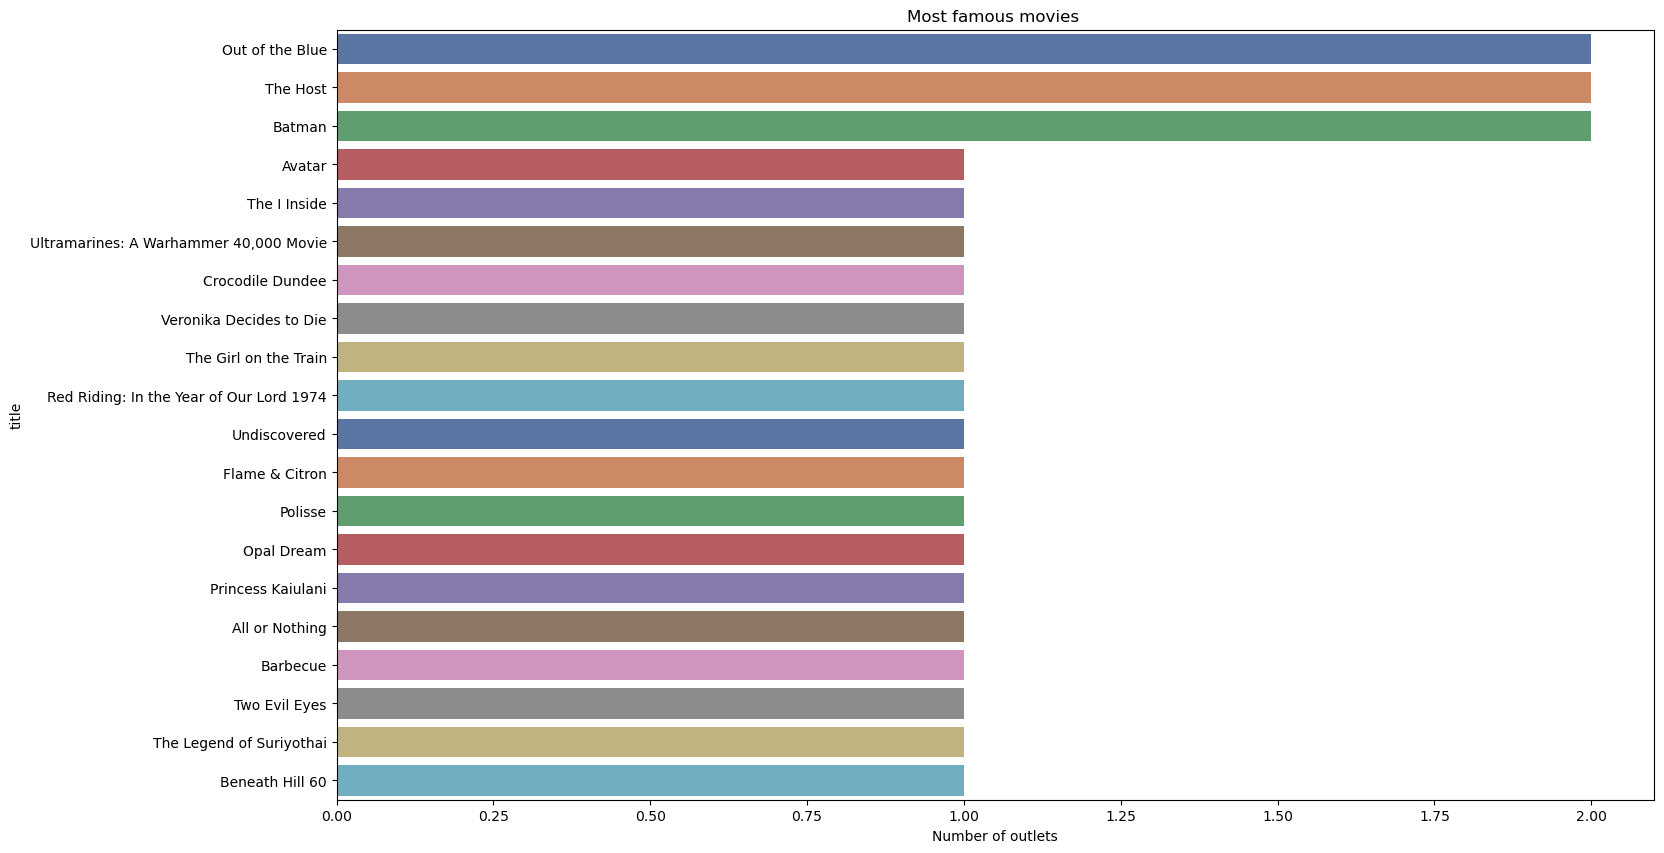

In [52]:
plt.figure(figsize = (17,10))
chains = data['title'].value_counts()[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Most famous movies ')
plt.xlabel('Number of outlets')
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Rating Distribution')

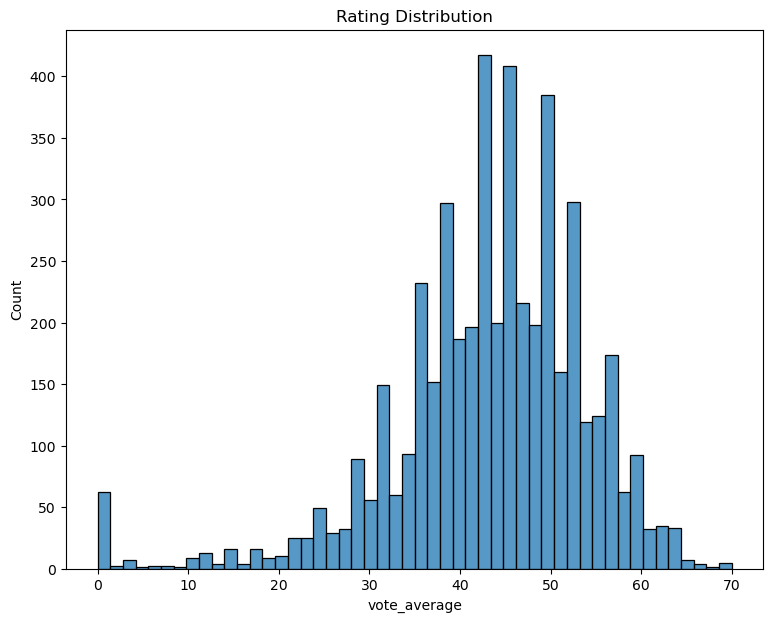

In [73]:
plt.figure(figsize = (9,7))
sns.histplot(data['vote_average'])
plt.title('Rating Distribution')

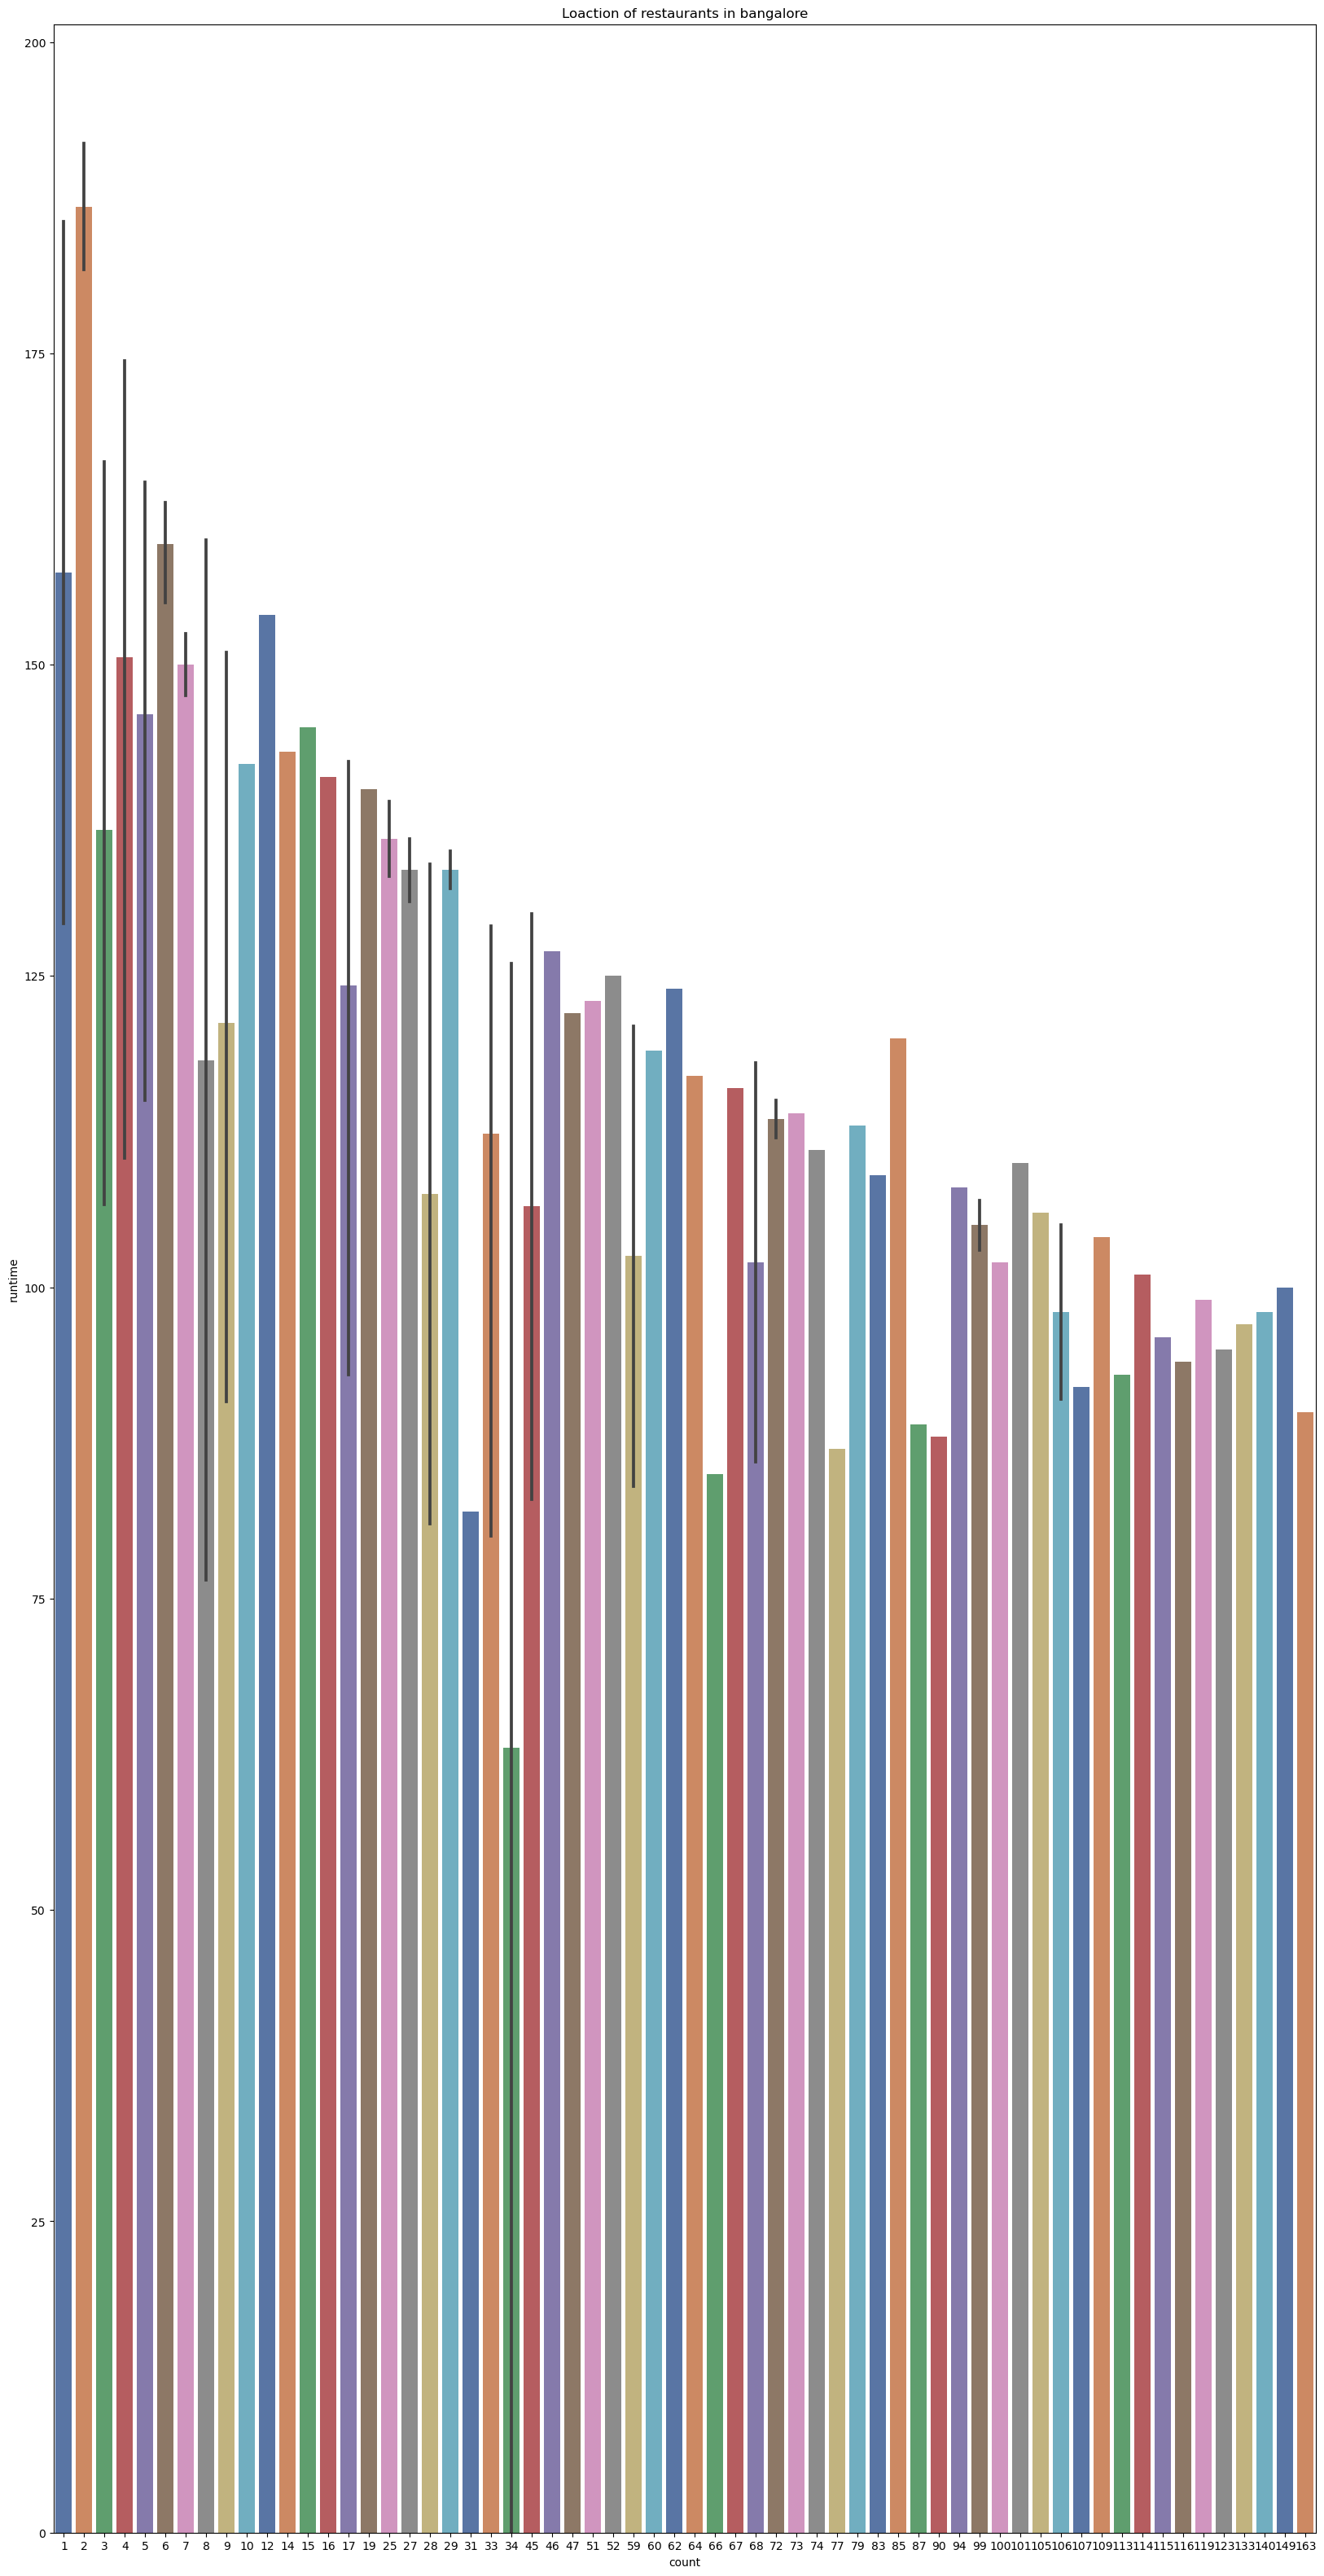

In [54]:
plt.figure(figsize=  (20,40))
chains = data['runtime'].value_counts()#[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Loaction of restaurants in bangalore')
plt.show()

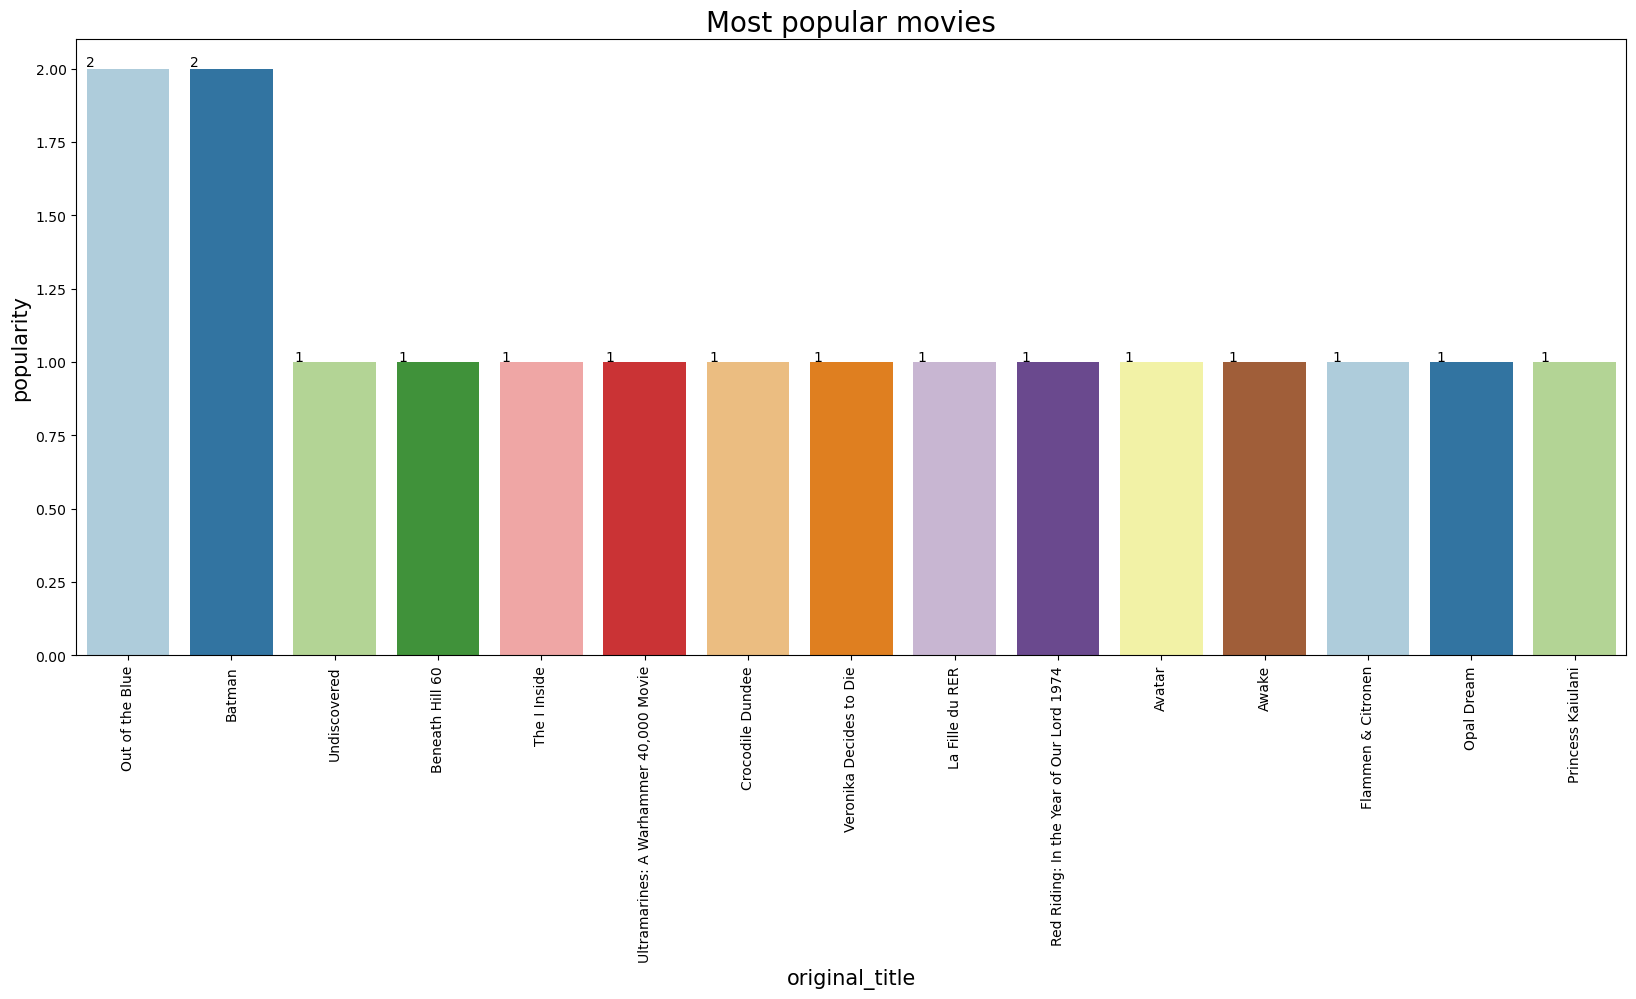

In [55]:
v = df['original_title'].value_counts()[:15]
plt.figure(figsize = (20,8))

ax  = sns.barplot(x = v.index, y = v, palette = 'Paired')

for i in ax.patches:
    ax.annotate(i.get_height().astype(int), (i.get_x()*1.005, i.get_height()*1.005))


plt.title('Most popular movies', fontsize = 20)
plt.xlabel('original_title', fontsize = 15)
plt.ylabel('popularity', fontsize = 15)
plt.xticks(rotation =90)
plt.show()

In [56]:
data.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,director,combined_features
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,culture clash future space war space colony so...
1,1,300000000,Adventure Fantasy Action,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,ocean drug abuse exotic island east india trad...
2,2,245000000,Action Adventure Crime,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,spy based on novel secret agent sequel mi6 Dan...
3,3,250000000,Action Crime Drama Thriller,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,dc comics crime fighter terrorist secret ident...
4,4,260000000,Action Adventure Science Fiction,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,based on novel mars medallion space travel pri...


In [76]:
df.to_excel("C:\\Users\\Hp\\OneDrive\\Desktop\\dsbdal-mini project\\new_dataset.xlsx")

In [77]:
X = df.iloc[:,[2,3,5,6,7,9,10,12]]
y = df['vote_average']

In [64]:
X


,genres,homepage,keywords,original_language,original_title,popularity,production_companies,release_date
0,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,culture clash future space war space colony so...,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10
1,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19
2,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,spy based on novel secret agent sequel mi6,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26
3,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16
4,Action Adventure Science Fiction,http://movies.disney.com/john-carter,based on novel mars medallion space travel pri...,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07
...,...,...,...,...,...,...,...,...
4798,Action Crime Thriller,NaN,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",1992-09-04
4799,Comedy Romance,NaN,,en,Newlyweds,0.642552,[],2011-12-26
4800,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13
4801,,http://shanghaicalling.com/,,en,Shanghai Calling,0.857008,[],2012-05-03


In [66]:
y

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)


In [68]:
X_train

,genres,homepage,keywords,original_language,original_title,popularity,production_companies,release_date
2946,Romance Drama,NaN,brother brother relationship mentally disabled...,en,What's Eating Gilbert Grape,33.282794,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",1993-12-17
2688,Thriller Mystery Adventure,NaN,hawaii honeymoon double murder murder,en,A Perfect Getaway,20.792603,"[{""name"": ""Davis Entertainment"", ""id"": 1302}, ...",2009-06-08
352,Animation Family Adventure,NaN,homeland musical training daughter cricket,en,Mulan,67.427755,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",1998-06-18
1306,Adventure Family Fantasy Animation,NaN,,zh,Dragon Nest: Warriors' Dawn,5.057695,"[{""name"": ""Mili Pictures"", ""id"": 60714}]",2014-05-20
1092,Thriller Mystery,NaN,london england cia war crimes tony blair author,en,The Ghost Writer,21.118196,"[{""name"": ""Studio Babelsberg"", ""id"": 264}, {""n...",2010-02-12
...,...,...,...,...,...,...,...,...
1180,Comedy Romance,NaN,overweight beauty hypnosis overweight man over...,en,Shallow Hal,29.854773,"[{""name"": ""Twentieth Century Fox Film Corporat...",2001-11-01
3441,Drama,NaN,england leeds united sport brighton soccer,en,The Damned United,13.409125,"[{""name"": ""BBC Films"", ""id"": 288}, {""name"": ""C...",2009-03-27
1344,Science Fiction Comedy Adventure,http://www.mgm.com/view/Movie/2387/Hot-T...,female nudity one-night stand time travel time...,en,Hot Tub Time Machine,33.926473,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",2010-03-26
4623,Action Comedy Science Fiction,NaN,dystopia street race reality spoof,en,Death Race 2000,6.473667,"[{""name"": ""New World Pictures"", ""id"": 1950}]",1975-04-27


In [69]:
y_train

2946    7.5
2688    6.2
352     7.6
1306    6.8
1092    6.7
       ... 
1180    5.7
3441    7.2
1344    6.0
4623    5.9
1289    7.3
Name: vote_average, Length: 3362, dtype: float64